# ML-Projekt

Luca Dock - 79768

Maximilian Büchler - 79695

Jonas Blümm - 80640

Team ID = 240103

In [2]:
team_ID = 79768 + 79695 + 80640
print(team_ID)

240103


## Schritt 1

Trainingsdaten laden

In [3]:
import pandas as pd
import sklearn
import numpy as np
from sklearn.model_selection import *
from sklearn.linear_model import *
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score

data_raw = pd.read_csv("data/project/train.csv", delimiter=';')
data_raw.head()

,transactionId,basket,customerType,totalAmount,returnLabel
0,9534310106,"[4, 3, 4]",new,252.0,1
1,7202594767,"[4, 2, 0, 2, 5]",existing,70.0,0
2,2737331698,[5],existing,84.0,0
3,4868011733,"[1, 4, 2, 4]",existing,116.0,0
4,7622406570,"[2, 5, 3, 2, 3, 2, 0]",existing,378.0,0


In [4]:
data_raw.shape

(22400, 5)

## Schritt 2

EDA (Exploratory Data Analysis)

<AxesSubplot:>

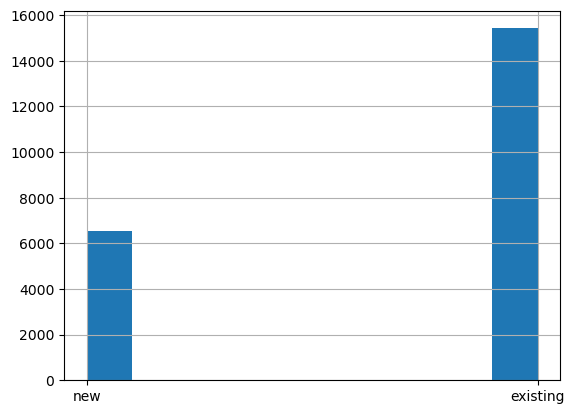

In [5]:
data_raw["customerType"].hist()

<AxesSubplot:>

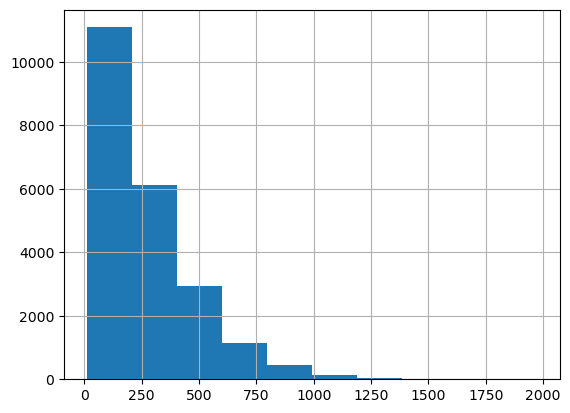

In [6]:
data_raw["totalAmount"].hist()

In [7]:
df_Cust_Existing = data_raw.loc[data_raw["customerType"]=="existing"]
df_Cust_Existing.head()

,transactionId,basket,customerType,totalAmount,returnLabel
1,7202594767,"[4, 2, 0, 2, 5]",existing,70.0,0
2,2737331698,[5],existing,84.0,0
3,4868011733,"[1, 4, 2, 4]",existing,116.0,0
4,7622406570,"[2, 5, 3, 2, 3, 2, 0]",existing,378.0,0
5,5023376715,"[3, 1, 3, 4]",existing,80.0,1


In [8]:
df_Cust_New = data_raw.loc[data_raw["customerType"]=="new"]
df_Cust_New.head()

,transactionId,basket,customerType,totalAmount,returnLabel
0,9534310106,"[4, 3, 4]",new,252.0,1
9,8428315544,"[2, 0, 3, 2, 3, 1, 4, 1]",new,376.0,0
12,2943511932,"[3, 5, 1, 5, 0, 1]",new,84.0,0
13,1568500392,"[3, 4]",new,204.0,0
15,8222551259,"[3, 4, 3, 4, 4, 0, 1]",new,616.0,1


Verteilung von returnLabel über customerType<br>
Die Verteilung von Zurückschicken bei Neukunden und Altkunden

<AxesSubplot:>

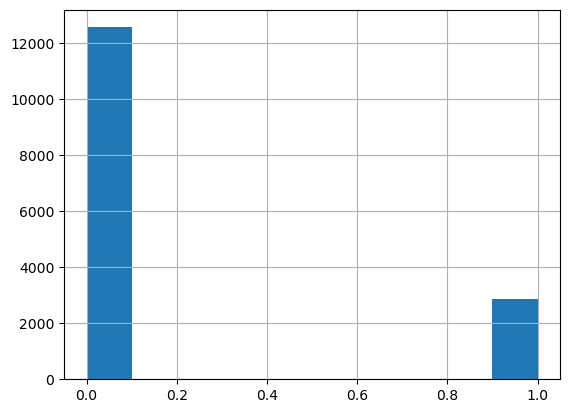

In [9]:
df_Cust_Existing["returnLabel"].hist()

<AxesSubplot:>

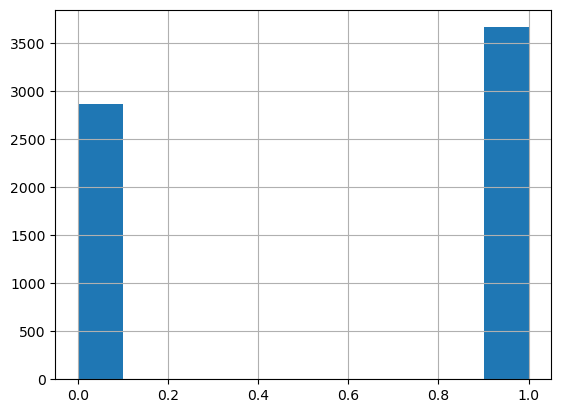

In [10]:
df_Cust_New["returnLabel"].hist()

Boxplot für TotalAmount

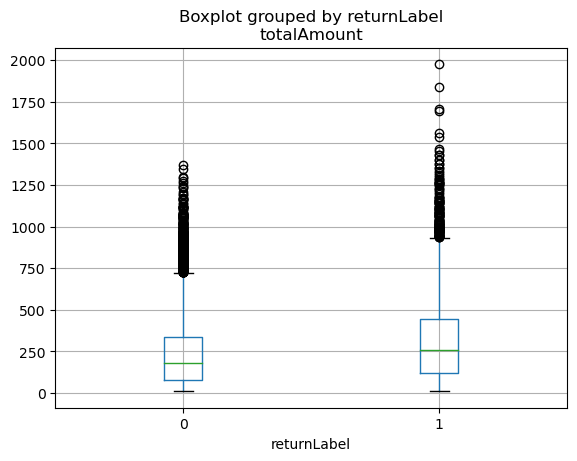

In [11]:
bp = data_raw.boxplot(column="totalAmount",by="returnLabel")


Displot -> x=returnLabel  y=totalAmount

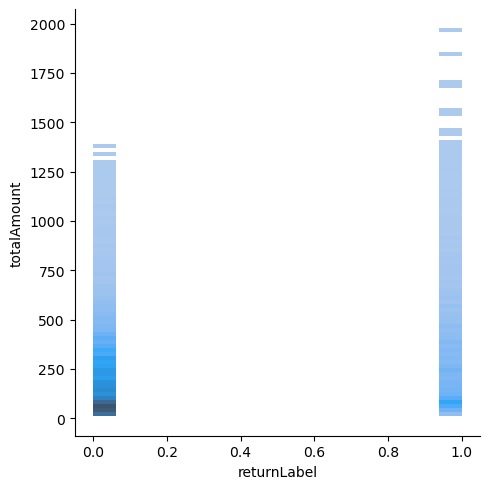

In [12]:
import seaborn as sb
sb.displot(data_raw, x="returnLabel", y="totalAmount")

## Schritt 3

Auffüllen der fehlenden Daten <br>
totalAmount => average<br>
customerType => das was am meisten vorkommt


In [13]:
data_raw.isna().sum()

transactionId      0
basket             0
customerType     442
totalAmount      477
returnLabel        0
dtype: int64

In [14]:
totalAmount_avg=data_raw["totalAmount"].mean()
data_raw["totalAmount"]=data_raw["totalAmount"].fillna(totalAmount_avg)

In [15]:
df_Cust_Existing.shape

(15426, 5)

In [16]:
df_Cust_New.shape

(6532, 5)

existing > new also befüllt man mit existing

In [17]:
data_raw["customerType"] = data_raw["customerType"].fillna("existing")

In [18]:
data_raw.isna().sum()

transactionId    0
basket           0
customerType     0
totalAmount      0
returnLabel      0
dtype: int64

## Schritt 4

One-Hot-Encoding
customerType

In [19]:
one_hot_feature_1 = pd.get_dummies(data_raw["customerType"])
one_hot_feature_1.head()

,existing,new
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [20]:
data_raw = pd.concat([data_raw, one_hot_feature_1], axis=1)
data_raw.head()

,transactionId,basket,customerType,totalAmount,returnLabel,existing,new
0,9534310106,"[4, 3, 4]",new,252.0,1,0,1
1,7202594767,"[4, 2, 0, 2, 5]",existing,70.0,0,1,0
2,2737331698,[5],existing,84.0,0,1,0
3,4868011733,"[1, 4, 2, 4]",existing,116.0,0,1,0
4,7622406570,"[2, 5, 3, 2, 3, 2, 0]",existing,378.0,0,1,0


## Schritt 5

Basket - Features erstellen

In [21]:
# @param x : zu zählende Kategorie (zwischen 0 und 5)
# @param ls : liste (basket)
def countCat(x,ls):
    arr = ls.replace("[","").replace("]","").replace(" ","").split(",")
    count = 0
    for i in arr:
       if int(i)==int(x):
            count=count+1
    return count

# @param x : Kategorie (siehe countCat)
# @param df : dataframe (data_raw)
# @return arr : komplette Spalte mit der Anzahl der Kategorie wird als array returned
def makeCountFeature(x, df):
    arr = []
    for i in df["basket"]:
        arr.append(countCat(x, i))
    return arr

# range 0,6 => von 0 bis 5
# data_raw[input] braucht array
for i in range (0,6):
    data_raw[str(i)] = makeCountFeature(i, data_raw)

data_raw.head(10)

,transactionId,basket,customerType,totalAmount,returnLabel,existing,new,0,1,2,3,4,5
0,9534310106,"[4, 3, 4]",new,252.0,1,0,1,0,0,0,1,2,0
1,7202594767,"[4, 2, 0, 2, 5]",existing,70.0,0,1,0,1,0,2,0,1,1
2,2737331698,[5],existing,84.0,0,1,0,0,0,0,0,0,1
3,4868011733,"[1, 4, 2, 4]",existing,116.0,0,1,0,0,1,1,0,2,0
4,7622406570,"[2, 5, 3, 2, 3, 2, 0]",existing,378.0,0,1,0,1,0,3,2,0,1
5,5023376715,"[3, 1, 3, 4]",existing,80.0,1,1,0,0,1,0,2,1,0
6,6369326559,"[4, 0, 0, 0, 5, 1]",existing,60.0,0,1,0,3,1,0,0,1,1
7,6726314328,"[2, 4, 4, 4, 4, 2, 4]",existing,616.0,1,1,0,0,0,2,0,5,0
8,3991839024,"[4, 1, 4, 4, 2, 0, 0, 4, 4, 1]",existing,100.0,0,1,0,2,2,1,0,5,0
9,8428315544,"[2, 0, 3, 2, 3, 1, 4, 1]",new,376.0,0,0,1,1,2,2,2,1,0


## Schritt 6

Skallieren der Features

In [22]:
df = data_raw[["totalAmount","existing","new","0","1","2","3","4","5", "returnLabel"]]
df.head(10)

,totalAmount,existing,new,0,1,2,3,4,5,returnLabel
0,252.0,0,1,0,0,0,1,2,0,1
1,70.0,1,0,1,0,2,0,1,1,0
2,84.0,1,0,0,0,0,0,0,1,0
3,116.0,1,0,0,1,1,0,2,0,0
4,378.0,1,0,1,0,3,2,0,1,0
5,80.0,1,0,0,1,0,2,1,0,1
6,60.0,1,0,3,1,0,0,1,1,0
7,616.0,1,0,0,0,2,0,5,0,1
8,100.0,1,0,2,2,1,0,5,0,0
9,376.0,0,1,1,2,2,2,1,0,0


In [23]:
df_X = df.drop(columns=["returnLabel"])
df_y = df["returnLabel"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_X)

## Schritt 7

Trainieren mit Cross-Validation per Logistische Regression

In [24]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV

parameter_candidates_logistic = [{'Cs':[0.1,1,4,5,6,10,30,100], 'penalty':['l1','l2']}]
parameter_candidates_random_forest = [{'max_depth': [2, 4, 6], 'n_estimators': [60,80,100,120,140]}]
#Parameter bei GBT wie bei Random forest

logisticReg = LogisticRegressionCV(random_state=0, penalty={'l1','l2'}, Cs=[0.1,1,4,5,6,10,30,100])
grid_clf_logistic = GridSearchCV(estimator=logisticReg, param_grid=parameter_candidates_logistic, n_jobs=-1)
grid_clf_logistic.fit(X_scaled, df_y)

c:\Users\krono\miniconda3\envs\ml-env\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\krono\miniconda3\envs\ml-env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\krono\miniconda3\envs\ml-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1672, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\krono\miniconda3\envs\ml-env\lib\site-packages\sklearn\linear_model\_logistic.py", l

GridSearchCV(estimator=LogisticRegressionCV(Cs=[0.1, 1, 4, 5, 6, 10, 30, 100],
                                            penalty={'l2', 'l1'},
                                            random_state=0),
             n_jobs=-1,
             param_grid=[{'Cs': [0.1, 1, 4, 5, 6, 10, 30, 100],
                          'penalty': ['l1', 'l2']}])

In [25]:
print('Best C:', grid_clf_logistic.best_estimator_.Cs) 
print('Best penalty:', grid_clf_logistic.best_estimator_.penalty)
print('Best score:', grid_clf_logistic.best_score_)

Best C: 5
Best penalty: l2
Best score: 0.8787500000000001


Trainieren mit Cross-Validation per RandomForest

In [26]:
from sklearn.ensemble import RandomForestClassifier

randomForest = RandomForestClassifier(random_state=0)
grid_clf_rf = GridSearchCV(estimator=randomForest, param_grid=parameter_candidates_random_forest, n_jobs=-1)
grid_clf_rf.fit(X_scaled, df_y)

print('Best n_estimator:', grid_clf_rf.best_estimator_.n_estimators) 
print('Best max depth:', grid_clf_rf.best_estimator_.max_depth)
print('Best score:', grid_clf_rf.best_score_)

Best n_estimator: 120
Best max depth: 6
Best score: 0.8685267857142858


In [27]:
from sklearn.ensemble import GradientBoostingClassifier

gradientBoostingTree = GradientBoostingClassifier(random_state=0)
grid_clf_gbt = GridSearchCV(estimator=gradientBoostingTree, param_grid=parameter_candidates_random_forest, n_jobs=-1)
grid_clf_gbt.fit(X_scaled, df_y)

print('Best n_estimator:', grid_clf_gbt.best_estimator_.n_estimators) 
print('Best max depth:', grid_clf_gbt.best_estimator_.max_depth) 
print('Best score:', grid_clf_gbt.best_score_)

Best n_estimator: 100
Best max depth: 4
Best score: 0.8788839285714285


# Schritt 8

Laden der Testdaten

In [28]:
test_data = pd.read_csv("data/project/test.csv", delimiter=';')
test_data.head()

,transactionId,basket,customerType,totalAmount,returnLabel
0,4132523932,"[4, 3, 4, 3, 2, 3]",existing,366.0,1
1,8998574539,"[3, 4, 4, 3, 5]",existing,85.0,0
2,9346688547,"[1, 1, 2, 2, 4, 4, 3, 1, 1, 0, 3]",existing,275.0,0
3,4533897707,"[3, 2, 2, 1, 5, 1, 1, 0]",existing,528.0,0
4,3334800500,"[4, 2, 3, 5, 2, 5, 1]",existing,287.0,0


In [29]:
test_data.shape

(9600, 5)

# Schritt 9

Entfernen von fehlerhaften Zeilen (fehlende Werte) 

In [30]:
test_data = test_data.dropna()

In [31]:
test_data.shape

(9226, 5)

von 9600 Zeilen auf 9226 Zeilen (fehlerhafte Zeilen : 9600 - 9226 = 374)

# Schritt 10

Transformieren der Attribute (wie die Trainingsdaten)

One-Hot-Encoding von customerType:

In [32]:
one_hot_feature_1 = pd.get_dummies(test_data["customerType"])
one_hot_feature_1.head()

,existing,new
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [33]:
test_data = pd.concat([test_data, one_hot_feature_1], axis=1)
test_data.head()

,transactionId,basket,customerType,totalAmount,returnLabel,existing,new
0,4132523932,"[4, 3, 4, 3, 2, 3]",existing,366.0,1,1,0
1,8998574539,"[3, 4, 4, 3, 5]",existing,85.0,0,1,0
2,9346688547,"[1, 1, 2, 2, 4, 4, 3, 1, 1, 0, 3]",existing,275.0,0,1,0
3,4533897707,"[3, 2, 2, 1, 5, 1, 1, 0]",existing,528.0,0,1,0
4,3334800500,"[4, 2, 3, 5, 2, 5, 1]",existing,287.0,0,1,0


Basket-Features erstellen

In [34]:
for i in range (0,6):
    test_data[str(i)] = makeCountFeature(i, test_data)

test_data.head(10)

,transactionId,basket,customerType,totalAmount,returnLabel,existing,new,0,1,2,3,4,5
0,4132523932,"[4, 3, 4, 3, 2, 3]",existing,366.0,1,1,0,0,0,1,3,2,0
1,8998574539,"[3, 4, 4, 3, 5]",existing,85.0,0,1,0,0,0,0,2,2,1
2,9346688547,"[1, 1, 2, 2, 4, 4, 3, 1, 1, 0, 3]",existing,275.0,0,1,0,1,4,2,2,2,0
3,4533897707,"[3, 2, 2, 1, 5, 1, 1, 0]",existing,528.0,0,1,0,1,3,2,1,0,1
4,3334800500,"[4, 2, 3, 5, 2, 5, 1]",existing,287.0,0,1,0,0,1,2,1,1,2
6,2186728765,"[2, 1, 0, 4, 0, 3, 1]",new,609.0,0,0,1,2,2,1,1,1,0
7,3199662184,"[3, 4, 0, 2, 2, 3, 3]",existing,770.0,0,1,0,1,0,2,3,1,0
8,5402321657,[5],existing,43.0,0,1,0,0,0,0,0,0,1
9,2412583752,[4],new,50.0,1,0,1,0,0,0,0,1,0
10,6514158177,"[1, 5, 0, 4, 1, 3, 0, 3]",existing,408.0,0,1,0,2,2,0,2,1,1


DataFrame endgültig anpassen (überflüssige Zeilen entfernen):

In [35]:
df_test = test_data[["totalAmount","existing","new","0","1","2","3","4","5", "returnLabel"]]
df_test.head(10)

,totalAmount,existing,new,0,1,2,3,4,5,returnLabel
0,366.0,1,0,0,0,1,3,2,0,1
1,85.0,1,0,0,0,0,2,2,1,0
2,275.0,1,0,1,4,2,2,2,0,0
3,528.0,1,0,1,3,2,1,0,1,0
4,287.0,1,0,0,1,2,1,1,2,0
6,609.0,0,1,2,2,1,1,1,0,0
7,770.0,1,0,1,0,2,3,1,0,0
8,43.0,1,0,0,0,0,0,0,1,0
9,50.0,0,1,0,0,0,0,1,0,1
10,408.0,1,0,2,2,0,2,1,1,0


In [36]:
df_test_X = df_test.drop(columns=["returnLabel"])
df_test_y = df_test["returnLabel"]

# Schritt 11

Skalieren der Testdaten

In [37]:
X_scaled_test = scaler.fit_transform(df_test_X)

# Schritt 12 und 13

Vorhersagen und Scores

Logistische Regression mit C=5 und penalty=l2 

In [38]:
predictions_logistic = grid_clf_logistic.predict(X_scaled_test)

In [39]:
print("Accuracy", accuracy_score(df_test_y, predictions_logistic))
print("Precision", precision_score(df_test_y, predictions_logistic))
print("Recall", recall_score(df_test_y, predictions_logistic))

Accuracy 0.8732928679817906
Precision 0.8094494338149161
Recall 0.7527233115468409


RandomForest mit n_estimator = 120 und max_depth = 6

In [40]:
predictions_rf = grid_clf_rf.predict(X_scaled_test)

In [41]:
print("Accuracy", accuracy_score(df_test_y, predictions_rf))
print("Precision", precision_score(df_test_y, predictions_rf))
print("Recall", recall_score(df_test_y, predictions_rf))

Accuracy 0.8605029265120312
Precision 0.8007380073800738
Recall 0.7091503267973857


Gradient Boosting Tree mit n_estimator = 100 und max_depth = 4

In [42]:
predictions_gbt = grid_clf_gbt.predict(X_scaled_test)

In [43]:
print("Accuracy", accuracy_score(df_test_y, predictions_gbt))
print("Precision", precision_score(df_test_y, predictions_gbt))
print("Recall", recall_score(df_test_y, predictions_gbt))

Accuracy 0.8731844786473011
Precision 0.8011406844106463
Recall 0.7650689905591866


# Schritt 14

Accuracy berechnen auf den Trainingsdaten

In [44]:
predictions_logistic_train = grid_clf_logistic.predict(X_scaled)

In [45]:
print("Accuracy", accuracy_score(df_y, predictions_logistic_train))
print("Precision", precision_score(df_y, predictions_logistic_train))
print("Recall", recall_score(df_y, predictions_logistic_train))

Accuracy 0.8784821428571429
Precision 0.8216039279869067
Recall 0.7546602525556224


RandomForest mit n_estimator = 120 und max_depth = 6

In [46]:
predictions_rf_train = grid_clf_rf.predict(X_scaled)

In [47]:
print("Accuracy", accuracy_score(df_y, predictions_rf_train))
print("Precision", precision_score(df_y, predictions_rf_train))
print("Recall", recall_score(df_y, predictions_rf_train))

Accuracy 0.8697321428571428
Precision 0.8145215633423181
Recall 0.7268490679494889


Gradient Boosting Tree mit n_estimator = 100 und max_depth = 4

In [48]:
predictions_gbt_train = grid_clf_gbt.predict(X_scaled)

In [49]:
print("Accuracy", accuracy_score(df_y, predictions_gbt_train))
print("Precision", precision_score(df_y, predictions_gbt_train))
print("Recall", recall_score(df_y, predictions_gbt_train))

Accuracy 0.8861160714285714
Precision 0.8233717079325028
Recall 0.7848767288033675


Es liegt kein Overfitting vor, denn die Werte bei den Trainingsdaten sind nicht signifikant besser als die Testdaten, unterschiede im Bereich von maximal 2-3%.

# Schritt 15

1) Falsche Vorhersagen bestimmen

In [50]:
# @param predictions : prediction-Array von den Modellen
def findFalscheVorhersagen(predictions):
    ls = []
    counter = 0 # index des dataFrames (Test_DataFrame (Label))
    for i in predictions:
        if(i != df_test_y.iloc[counter]):
            ls.append(counter)
        counter+=1     
    return ls

logistic_failures = findFalscheVorhersagen(predictions_logistic)
len(logistic_failures)

1169

In [51]:
rf_failures = findFalscheVorhersagen(predictions_rf)
len(rf_failures)

1287

In [52]:
gbt_failures = findFalscheVorhersagen(predictions_gbt)
len(gbt_failures)

1170

2. gemeinsame Falsche Vorhersagen bestimmen

In [53]:
falscheVorhersagen_logisticReg = set(logistic_failures)
falscheVorhersagen_rf = set(rf_failures)
falscheVorhersagen_gbt = set(gbt_failures)

falscheVorhersagen = falscheVorhersagen_logisticReg.intersection(falscheVorhersagen_rf & falscheVorhersagen_gbt)
len(falscheVorhersagen)

889